In [1]:
import numpy as np
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-06-25 09:53.


In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [3]:
adata = scv.datasets.pancreas()
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

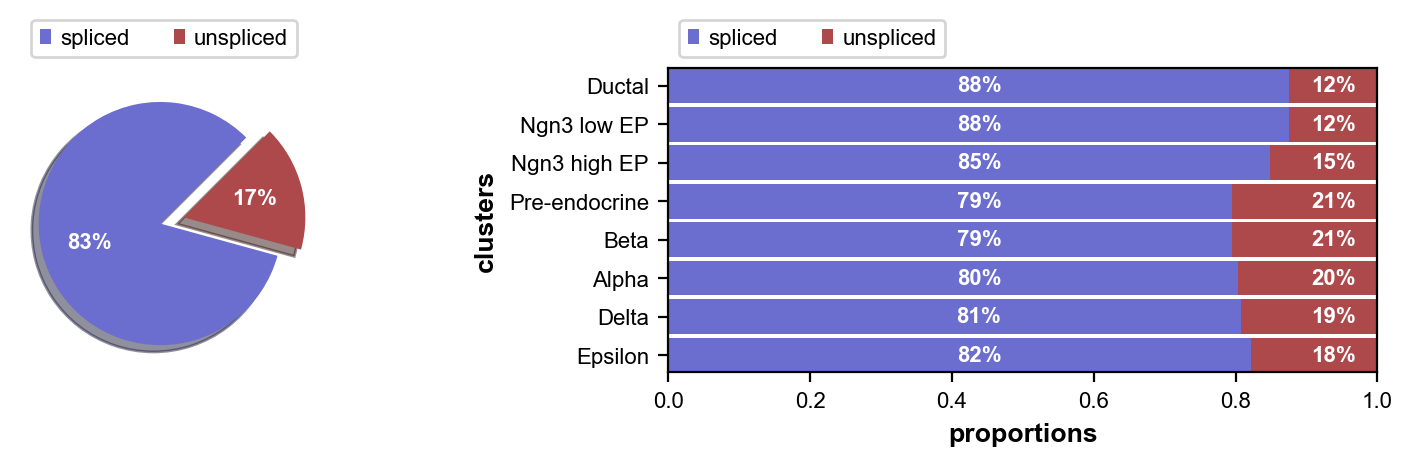

In [4]:
scv.pl.proportions(adata)

In [7]:
Spliced = adata.to_df(layer='spliced')+1
Unspliced = adata.to_df(layer='unspliced')+1

In [8]:
adata.layers['spliced'] = Spliced
adata.layers['unspliced'] = Unspliced

In [11]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [12]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Extracted 2000 highly variable genes.


In [13]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Extracted 2000 highly variable genes.
computing neighbors
    finished (0:02:08) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [14]:
Spliced = adata.to_df(layer='Ms')
Unspliced = adata.to_df(layer='Mu')

In [15]:
scv.tl.velocity(adata)
gamma = adata.var['velocity_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*(Spliced)   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


index                Rgs20    Sbspon      Mcm3    Neurl3      Fhl2   Gm17767  \
index                                                                          
AAACCTGAGAGGGATA  0.003951 -0.208918 -0.199135 -0.030314 -0.432750 -0.011514   
AAACCTGAGCCTTGAT -0.055158  0.023968 -0.145807 -0.085790 -0.202381 -0.058758   
AAACCTGAGGCAATTA  0.024261 -0.201454 -0.200736 -0.040330 -0.211275  0.008009   
AAACCTGCATCATCCC -0.135823 -0.122494 -0.007418 -0.133215 -0.459859 -0.118770   
AAACCTGGTAAGTGGC  0.012349 -0.194334 -0.184797 -0.022938 -0.253531 -0.003574   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA -0.020941 -0.238287 -0.191887 -0.052929 -0.421727 -0.035386   
TTTGTCAAGTGTGGCA -0.035235 -0.220519 -0.129069 -0.067299 -0.068042 -0.049720   
TTTGTCAGTTGTTTGG -0.031893 -0.133062 -0.167292 -0.064424 -0.202810 -0.046587   
TTTGTCATCGAATGCT -0.039184 -0.227494 -0.194736 -0.046750 -0.216305 -0.053177   
TTTGTCATCTGTTTGT -0.043329 -0.227992 -0.202497 -0.055042 -0.024398 -0.037170   

index              Ankrd44    Gm4208      Klf7    Akr1cl  ...     Usp51  \
index                                                     ...             
AAACCTGAGAGGGATA  1.007827 -0.017061  0.022329 -0.222156  ... -0.161712   
AAACCTGAGCCTTGAT  3.900928 -0.073962 -0.098741 -0.107844  ... -0.238322   
AAACCTGAGGCAATTA  1.979876  0.002177  0.099656 -0.215959  ... -0.087963   
AAACCTGCATCATCCC  3.750408 -0.123043 -0.233206 -0.291773  ... -0.251465   
AAACCTGGTAAGTGGC  0.957658 -0.009287 -0.110371 -0.209827  ... -0.198717   
...                    ...       ...       ...       ...  ...       ...   
TTTGTCAAGTGACATA -0.135914 -0.040565  0.077707 -0.228945  ... -0.171167   
TTTGTCAAGTGTGGCA  4.130311 -0.054911 -0.108761 -0.241958  ... -0.211562   
TTTGTCAGTTGTTTGG  4.663933 -0.051854 -0.148384 -0.052987  ... -0.234120   
TTTGTCATCGAATGCT  0.903361 -0.058191  0.158370 -0.238210  ... -0.029573   
TTTGTCATCTGTTTGT  2.378260 -0.042446 -0.157519 -0.234244  ... -0.068542   

index               Ubqln2     Cypt3   Map3k15    Adgrg2      Rai2     Ap1s2  \
index                                                                          
AAACCTGAGAGGGATA -0.031095  0.043110  0.111951 -0.018795 -0.035443  0.543883   
AAACCTGAGCCTTGAT -0.132033 -0.142375  0.121616 -0.075511 -0.241384  0.204140   
AAACCTGAGGCAATTA -0.037846 -0.055075  0.174439  0.000354 -0.178561  0.353223   
AAACCTGCATCATCCC -0.122826 -0.181433  0.012606 -0.124376 -0.261405  0.120622   
AAACCTGGTAAGTGGC -0.112088 -0.088814  0.658097 -0.011073 -0.209706  0.305921   
...                    ...       ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA -0.055668 -0.087888  0.252073 -0.014757 -0.181079  0.373546   
TTTGTCAAGTGTGGCA -0.132396 -0.126734 -0.115432 -0.056532 -0.221472  0.207267   
TTTGTCAGTTGTTTGG -0.132549 -0.124759  0.154846 -0.053499 -0.232307  0.241669   
TTTGTCATCGAATGCT -0.020301 -0.127514  0.325023 -0.059757 -0.015536  0.064418   
TTTGTCATCTGTTTGT -0.023912 -0.067426  0.079725 -0.044094 -0.087585  0.729499   

index               Tmem27     Ddx3y   Eif2s3y  
index                                           
AAACCTGAGAGGGATA -0.062345 -0.084826 -0.113482  
AAACCTGAGCCTTGAT -0.069665 -0.026382 -0.029976  
AAACCTGAGGCAATTA -0.035079 -0.115649 -0.135430  
AAACCTGCATCATCCC -0.068280 -0.355881 -0.202379  
AAACCTGGTAAGTGGC -0.068410 -0.289721 -0.091932  
...                    ...       ...       ...  
TTTGTCAAGTGACATA -0.065739 -0.035351 -0.206300  
TTTGTCAAGTGTGGCA -0.068927 -0.008511 -0.096095  
TTTGTCAGTTGTTTGG -0.069364 -0.060021 -0.174122  
TTTGTCATCGAATGCT -0.024012  0.167723 -0.136504  
TTTGTCATCTGTTTGT -0.032743 -0.163451 -0.072400  

[3696 rows x 2000 columns]

In [16]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:27) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:00) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


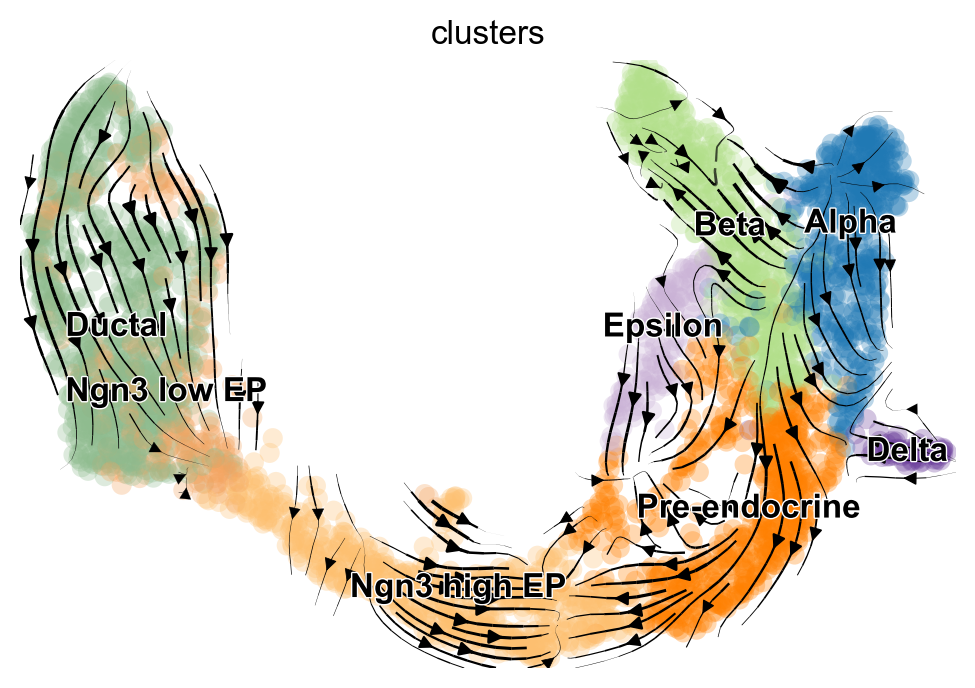

In [17]:
mc.acc_embedding_stream(adata)

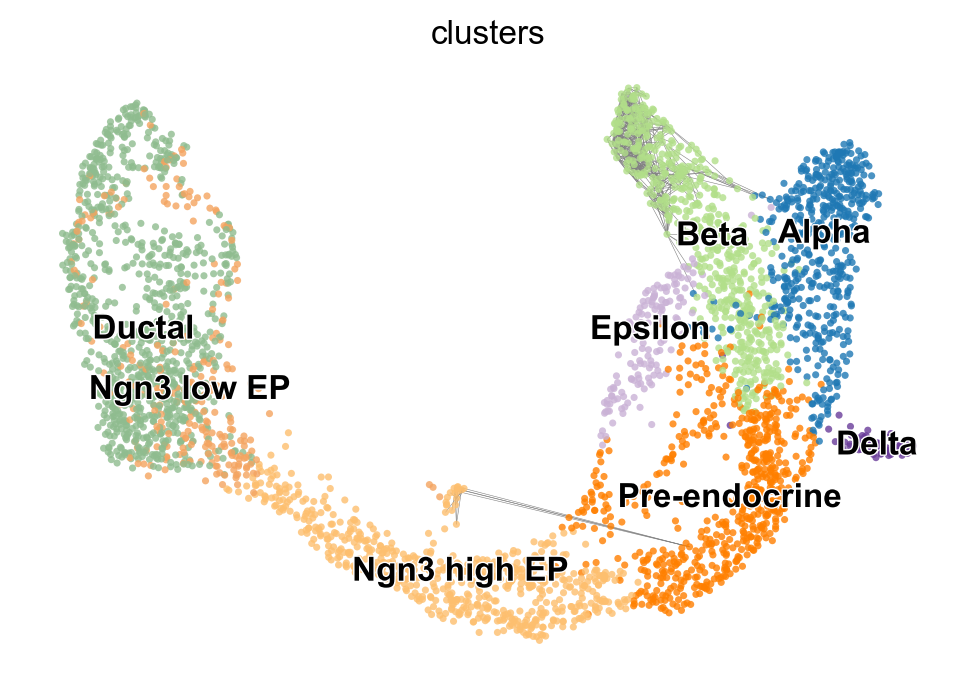

In [18]:
mc.acc_graph(adata)

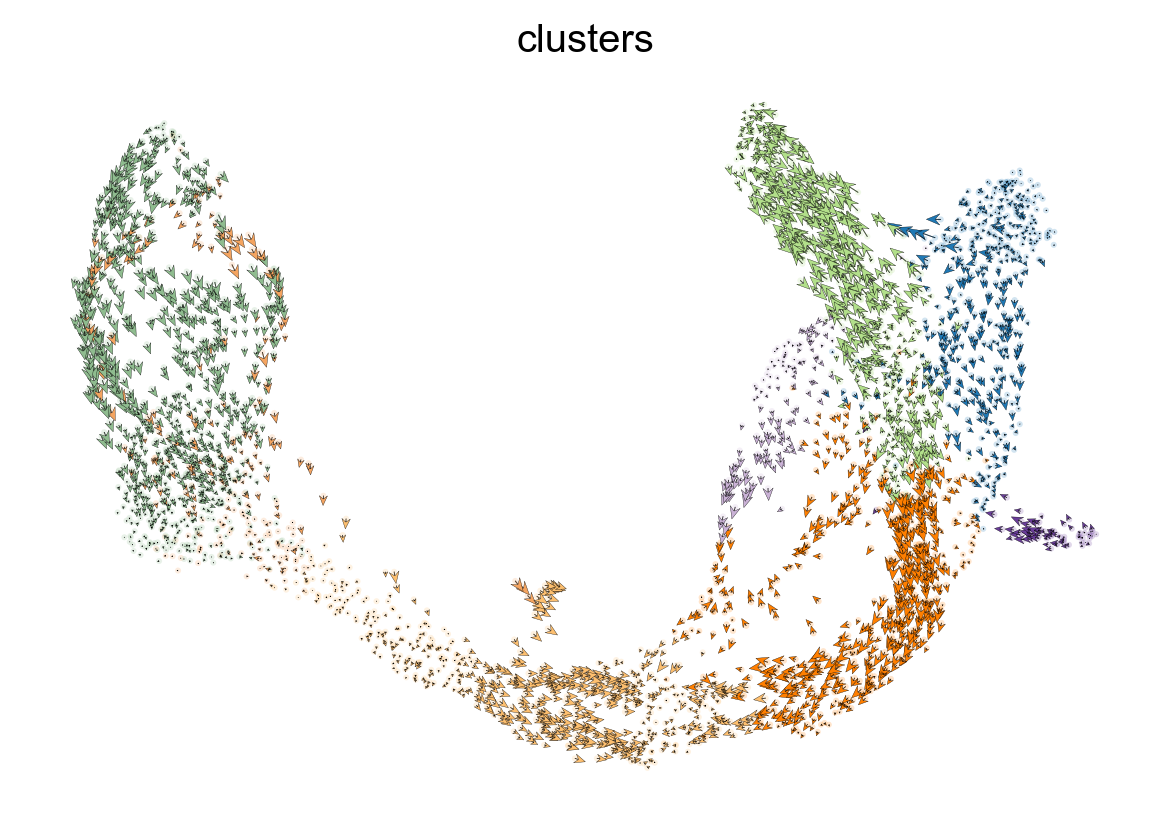

In [19]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

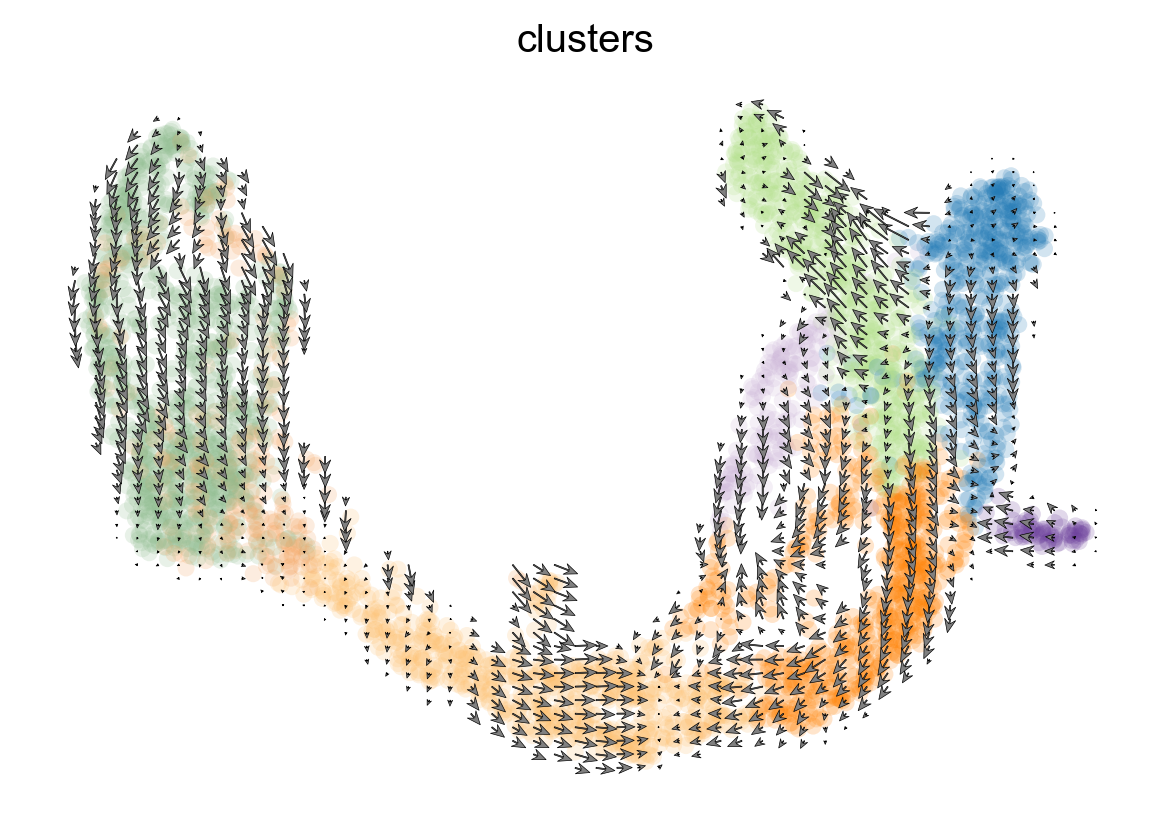

In [20]:
mc.acc_embedding_grid(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

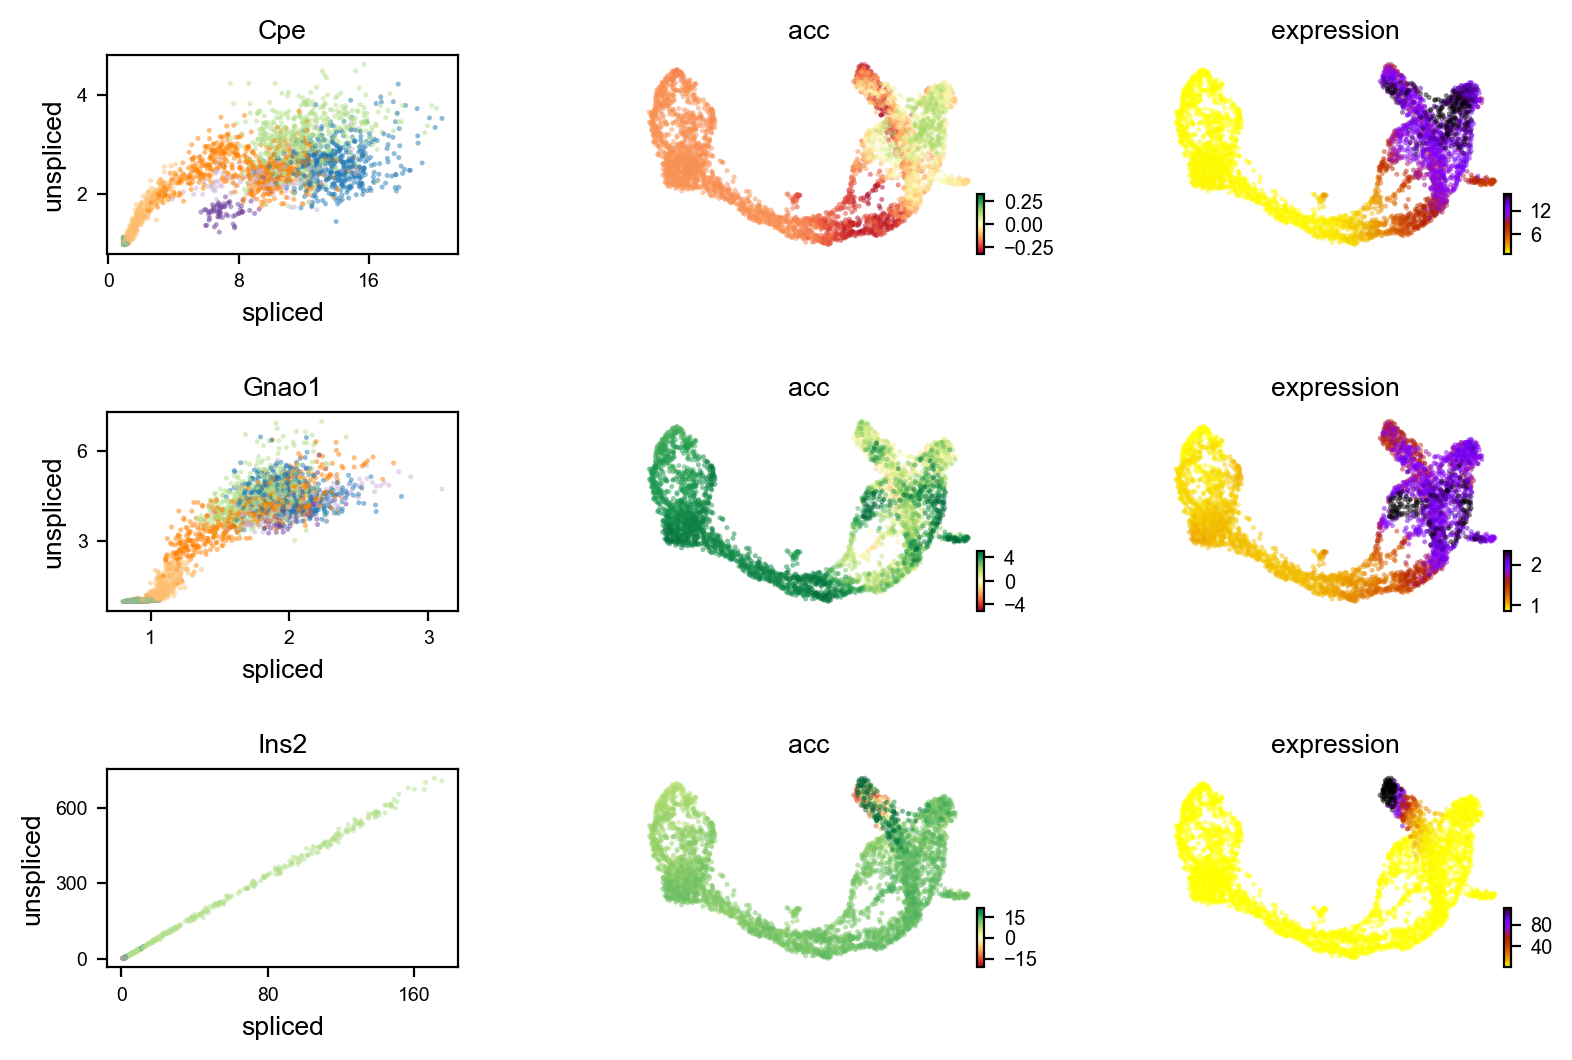

In [21]:
mc.acc(adata, ['Cpe', 'Gnao1', 'Ins2', 'Adk'])

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)
--> added 'acc_confidence_transition' (adata.obs)


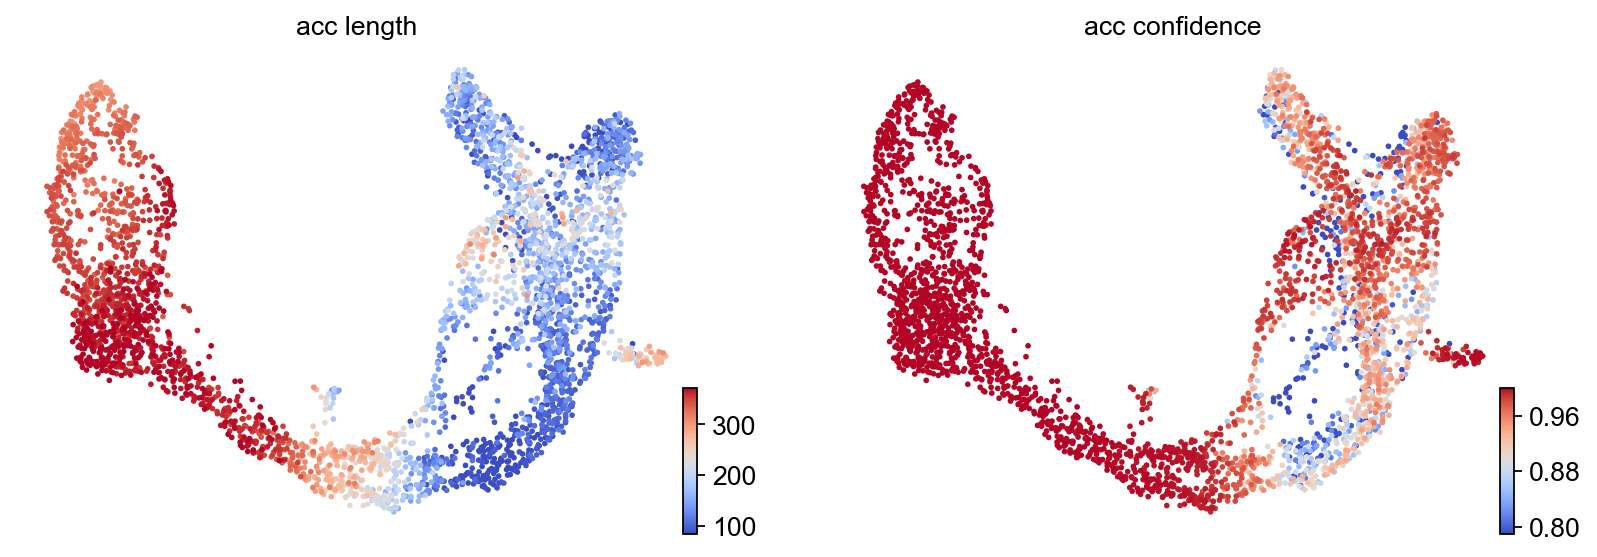

In [22]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

#### Steady State

In [23]:
gamma1 = Spliced/Unspliced
acc1 = Unspliced - (1+gamma1)*Unspliced + (gamma1**2)*(Spliced)   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc1

index                Rgs20    Sbspon       Mcm3    Neurl3      Fhl2   Gm17767  \
index                                                                           
AAACCTGAGAGGGATA  0.060251  0.060251   0.103284  0.060251 -0.364974  0.060251   
AAACCTGAGCCTTGAT -0.062436  2.385179   3.838620 -0.062436 -0.022473 -0.041977   
AAACCTGAGGCAATTA  0.108582  0.108582   0.108582  0.041203  0.049426  0.108582   
AAACCTGCATCATCCC -0.195571  0.874637  34.645760 -0.152454 -0.460515 -0.152454   
AAACCTGGTAAGTGGC  0.080334  0.151302   0.702395  0.080334  0.286584  0.080334   
...                    ...       ...        ...       ...       ...       ...   
TTTGTCAAGTGACATA  0.004702 -0.056232   0.231230  0.004702 -0.307330  0.004702   
TTTGTCAAGTGTGGCA -0.023327  0.023268   5.244292 -0.023327  0.738995 -0.023327   
TTTGTCAGTTGTTTGG -0.016196  0.740558   1.803282 -0.016196 -0.018140 -0.016196   
TTTGTCATCGAATGCT -0.032385 -0.032385   0.368998  0.020056 -0.033673 -0.032385   
TTTGTCATCTGTTTGT -0.039063  0.000022   0.049095  0.002554  1.484827  0.002554   

index              Ankrd44    Gm4208      Klf7    Akr1cl  ...     Usp51  \
index                                                     ...             
AAACCTGAGAGGGATA -1.272761  0.060251  1.232125  0.060251  ...  0.372561   
AAACCTGAGCCTTGAT -0.415294 -0.062436  0.340647  1.348307  ... -0.042080   
AAACCTGAGGCAATTA -1.032812  0.108582  1.613655  0.108582  ...  1.022877   
AAACCTGCATCATCCC -0.461425 -0.152454 -0.090948 -0.007903  ... -0.111275   
AAACCTGGTAAGTGGC -0.941121  0.080334  0.515642  0.151475  ...  0.152941   
...                    ...       ...       ...       ...  ...       ...   
TTTGTCAAGTGACATA -1.525853  0.004702  1.703441  0.004702  ...  0.286612   
TTTGTCAAGTGTGGCA -0.353367 -0.023327  0.339321 -0.023327  ...  0.088701   
TTTGTCAGTTGTTTGG -0.189387 -0.016196  0.142119  1.907869  ... -0.016196   
TTTGTCATCGAATGCT -1.025224 -0.032385  2.187152 -0.032385  ...  1.668730   
TTTGTCATCTGTTTGT -0.738083  0.002554  0.157544  0.002554  ...  1.225409   

index                 Ubqln2     Cypt3   Map3k15    Adgrg2      Rai2  \
index                                                                  
AAACCTGAGAGGGATA  107.545502  0.572007 -0.118862  0.060251  1.851713   
AAACCTGAGCCTTGAT    0.904734 -0.062436 -0.062436 -0.062436 -0.062436   
AAACCTGAGGCAATTA   93.295395  0.186216 -0.012346  0.108582  0.567052   
AAACCTGCATCATCCC    2.205583 -0.152454 -0.196926 -0.152454 -0.152454   
AAACCTGGTAAGTGGC    5.813823  0.080334  0.898424  0.080334  0.080334   
...                      ...       ...       ...       ...       ...   
TTTGTCAAGTGACATA   55.369087  0.073971  0.075891  0.068481  0.293252   
TTTGTCAAGTGTGGCA    0.853696 -0.023327 -0.452077 -0.023327  0.027651   
TTTGTCAGTTGTTTGG    0.962555 -0.016196 -0.016196 -0.016196 -0.016196   
TTTGTCATCGAATGCT  135.227173 -0.032385  0.168695 -0.032385  2.350441   
TTTGTCATCTGTTTGT  127.472183  0.144678 -0.152647  0.002554  1.223317   

index                Ap1s2       Tmem27     Ddx3y   Eif2s3y  
index                                                        
AAACCTGAGAGGGATA  0.414727     8.931950  0.022608  0.313775  
AAACCTGAGCCTTGAT -0.062436     0.048158  0.155520  0.638921  
AAACCTGAGGCAATTA  0.061075   520.870300 -0.071155  0.113248  
AAACCTGCATCATCCC -0.152454    -0.110651 -0.416902 -0.073292  
AAACCTGGTAAGTGGC  0.080334     0.080334 -0.345753  0.323041  
...                    ...          ...       ...       ...  
TTTGTCAAGTGACATA  0.134719     2.451260  0.160717 -0.061613  
TTTGTCAAGTGTGGCA -0.074671     0.028039  0.189079  0.250270  
TTTGTCAGTTGTTTGG -0.016196     0.033915  0.033213 -0.012641  
TTTGTCATCGAATGCT -0.333173  1270.524902  0.831870  0.202680  
TTTGTCATCTGTTTGT  0.693645   545.103027 -0.161124  0.371836  

[3696 rows x 2000 columns]

In [24]:
adata.layers['acc'] = acc1
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:27) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:00) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


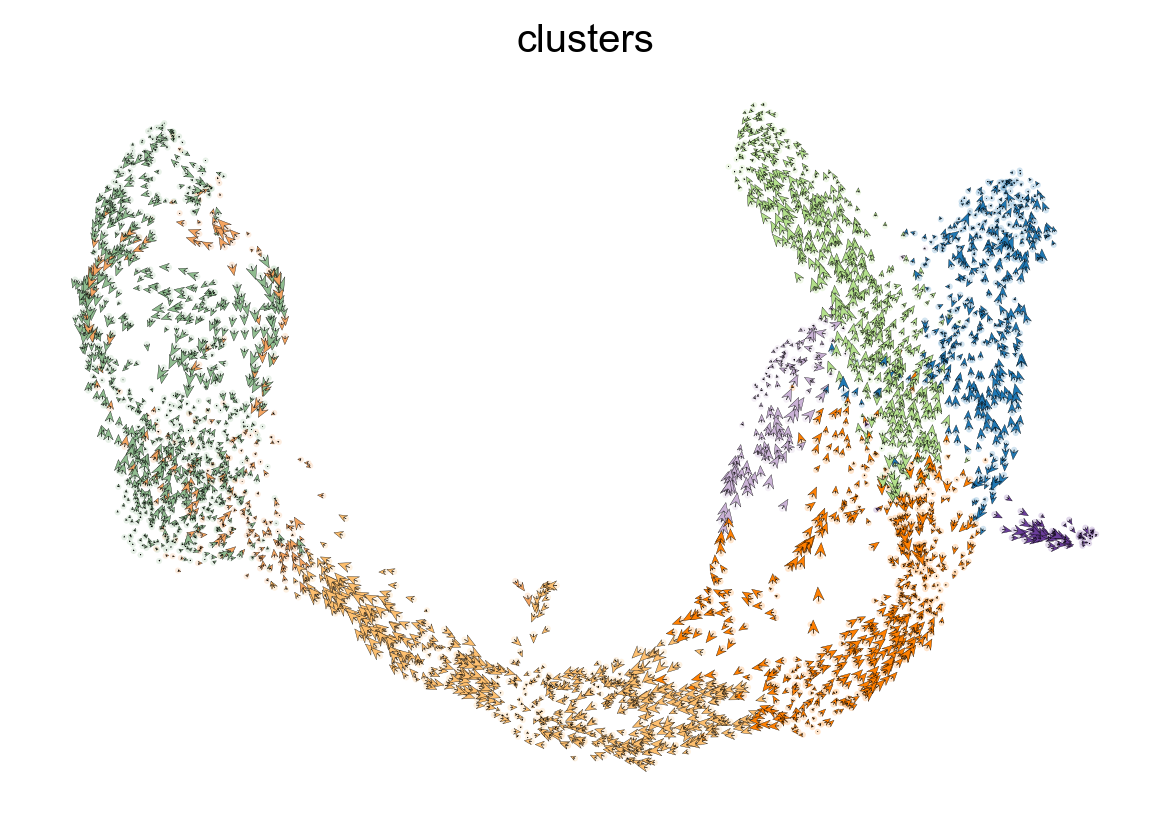

In [25]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

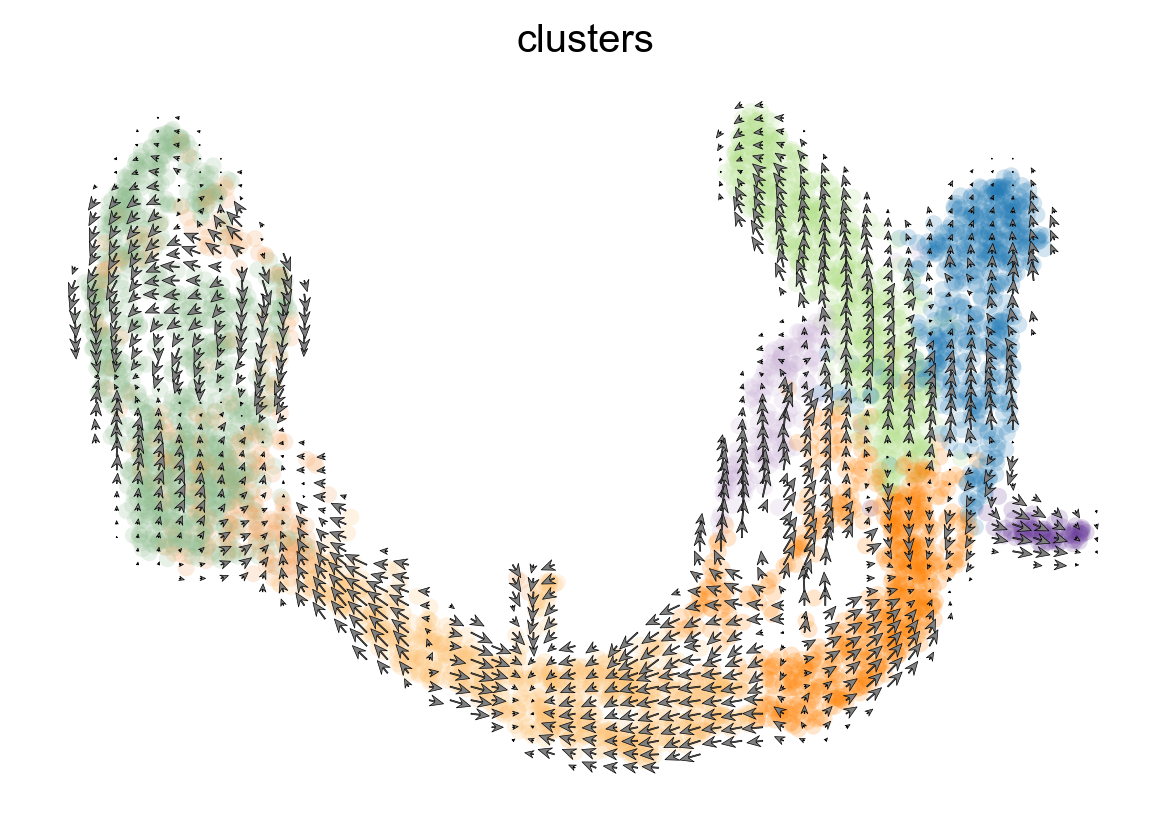

In [26]:
mc.acc_embedding_grid(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

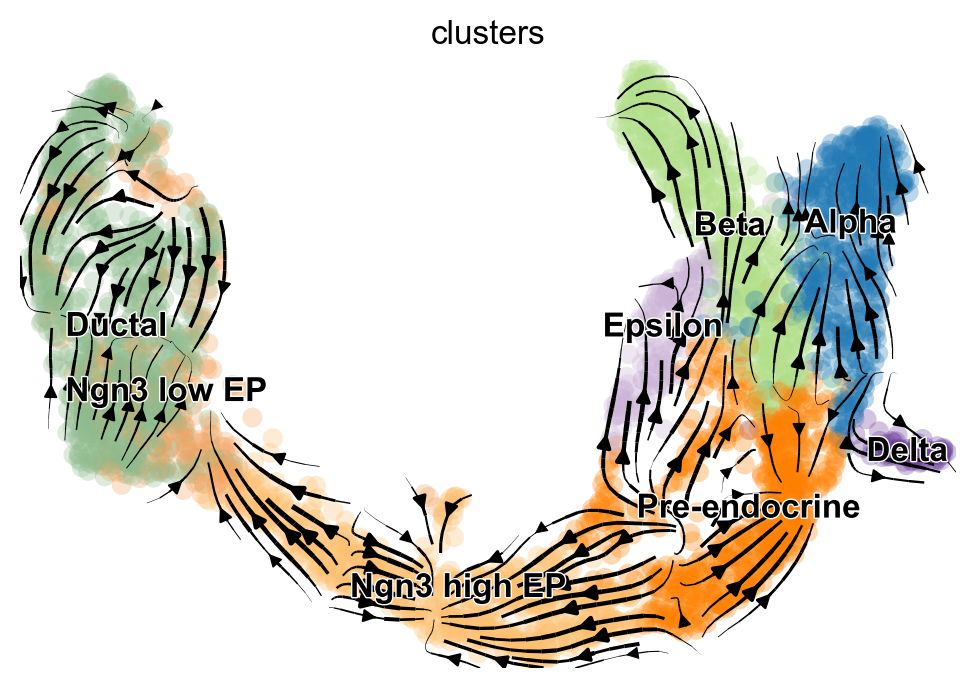

In [27]:
mc.acc_embedding_stream(adata)

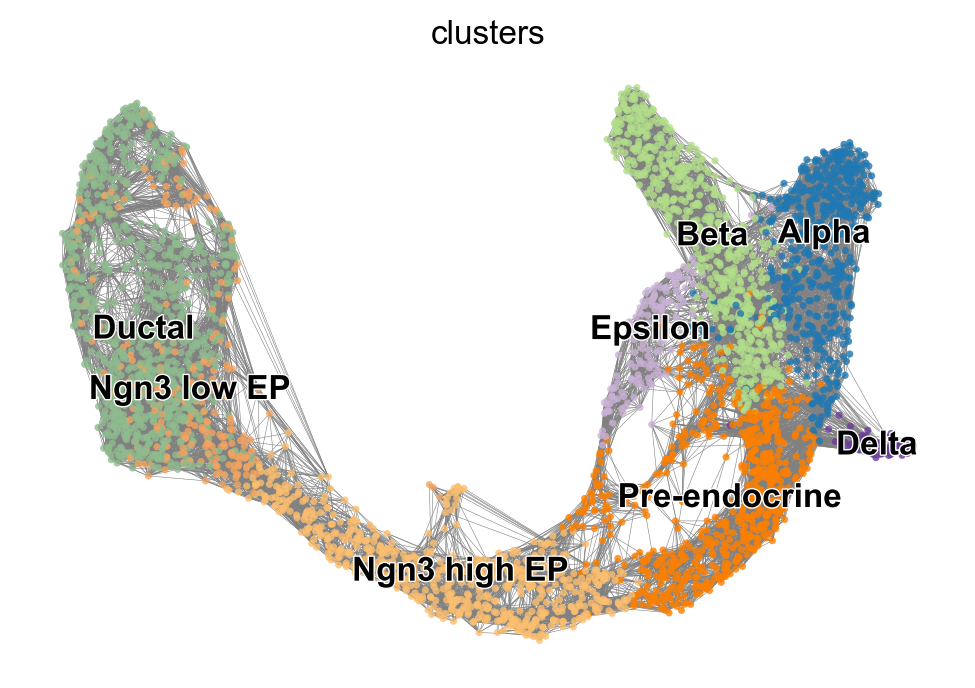

In [28]:
mc.acc_graph(adata)

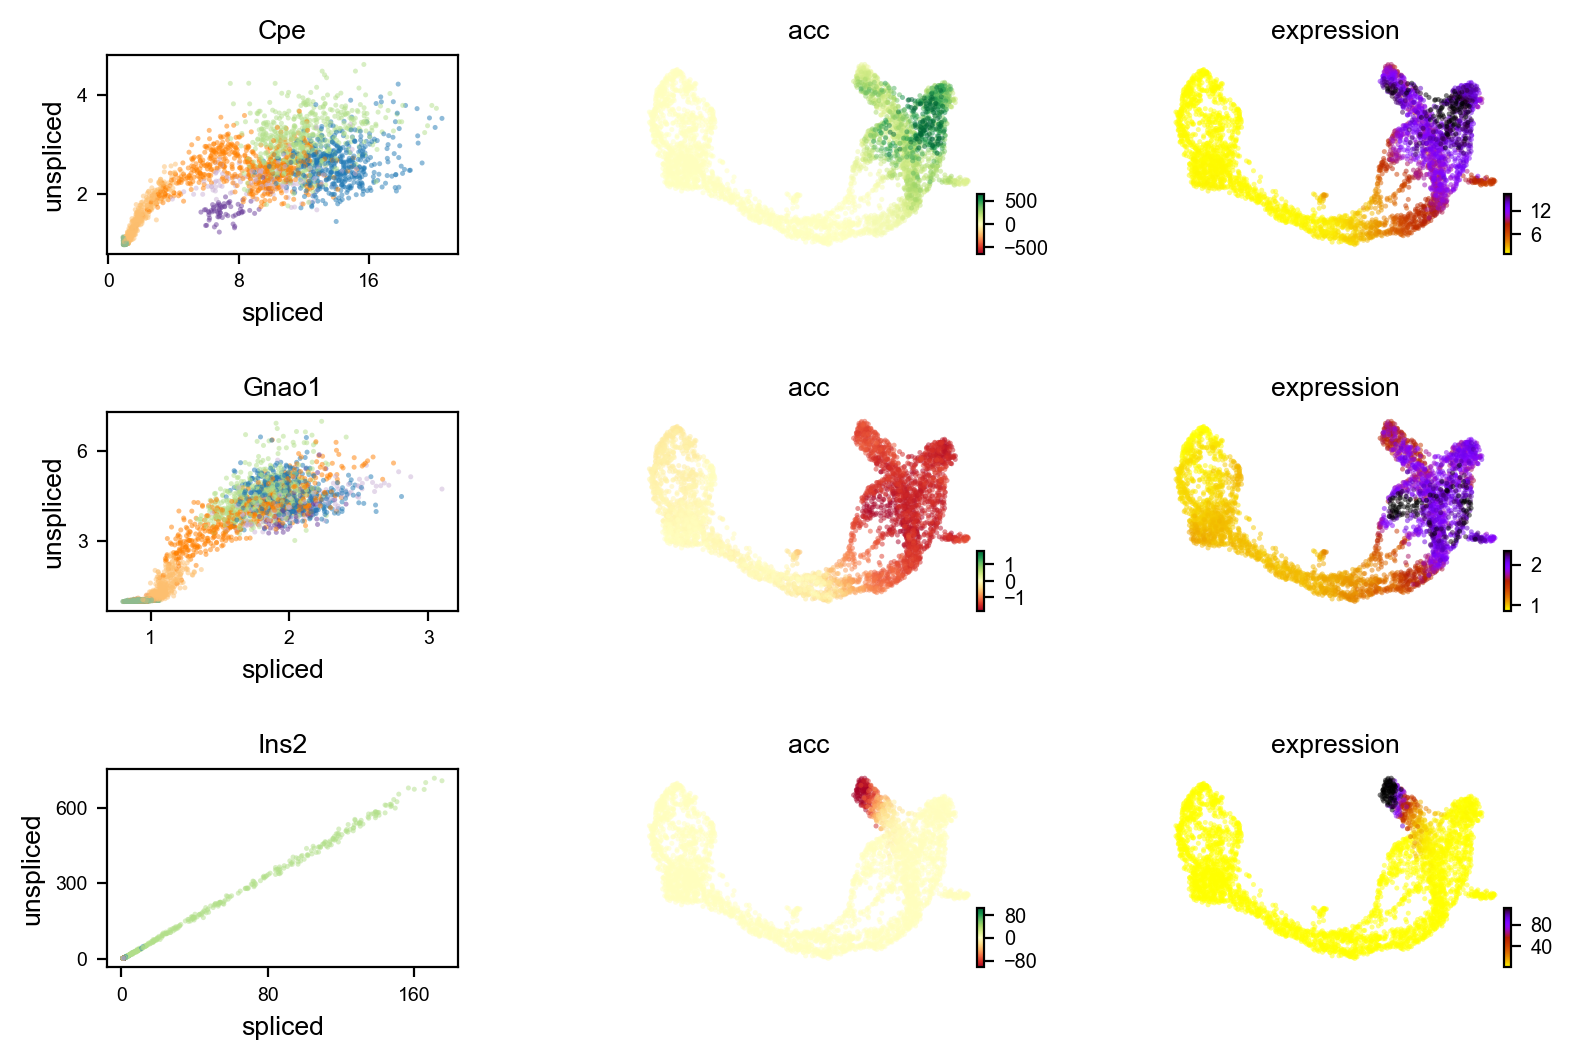

In [29]:
mc.acc(adata, ['Cpe', 'Gnao1', 'Ins2', 'Adk'])

In [30]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

mt.paga(adata, groups='clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 3 regions of root cells and 3 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['acc_pseudotime']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', acc transitions (adata.uns)


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


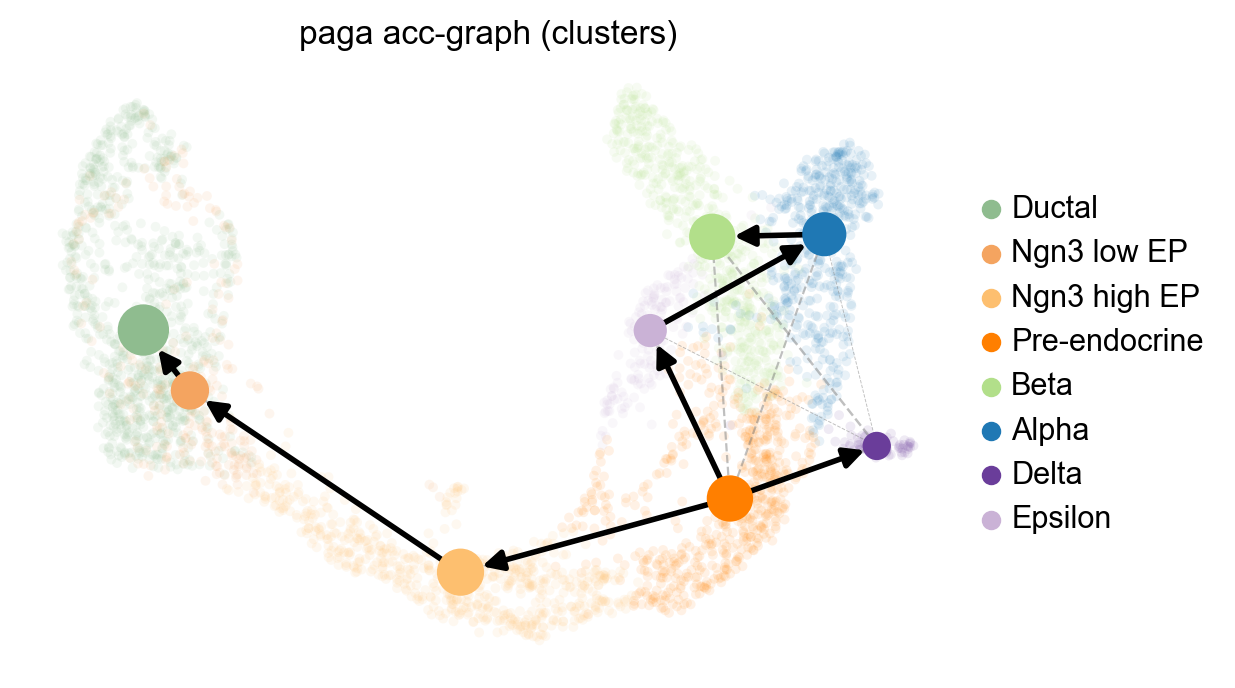

In [31]:
mc.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)


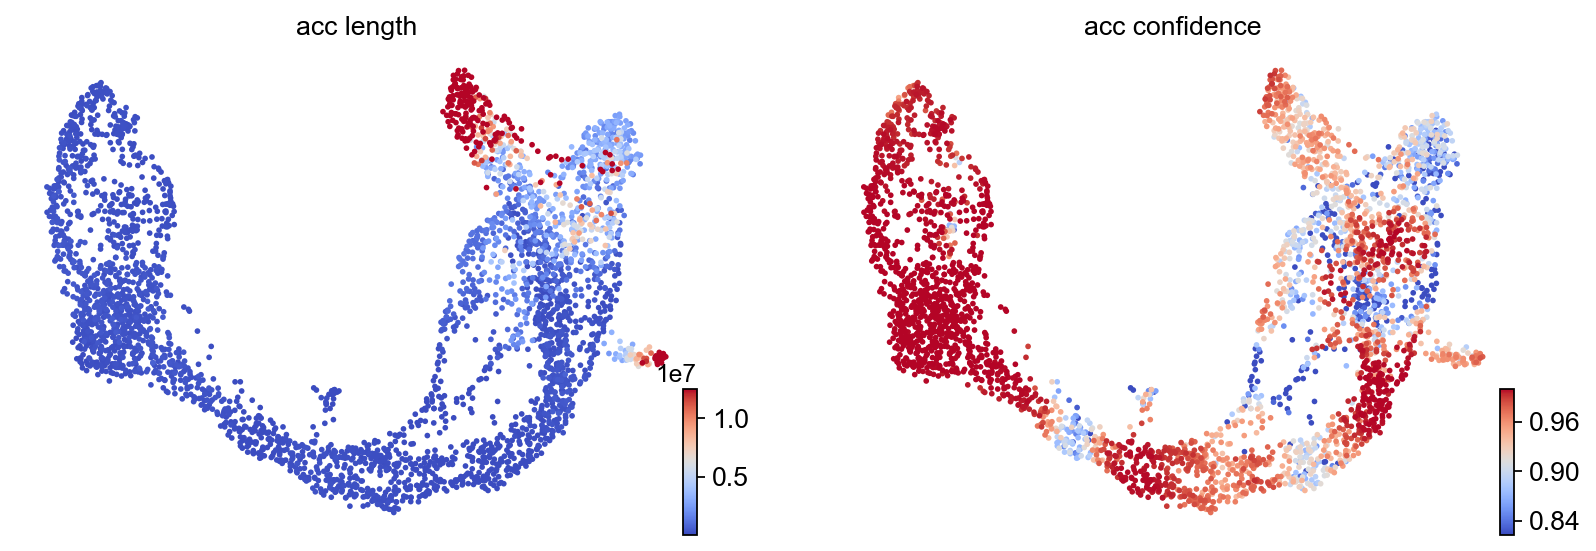

In [32]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])